In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo
from factor_analyzer import FactorAnalyzer
import pingouin as pg

## Analisis Faktor (Bagian 1) - Mempersiapkan Data Survei UX untuk Mengungkap Insight dengan Python

In [15]:
np.random.seed(123)
n_samples = 500

# Membuat 4 faktor laten
keandalan = np.random.normal(0, 1, n_samples)
aplikasi = np.random.normal(0, 1, n_samples)
layanan = np.random.normal(0, 1, n_samples)
nilai = np.random.normal(0, 1, n_samples)

# Membuat 20 item survei dengan noise yang lebih acak
data = {}
item_names = []
# Faktor 1: Keandalan (5 item)
for i in range(1, 6):
    name = f"q{i}_keandalan"
    data[name] = keandalan + np.random.normal(0, 1.2, n_samples)
    item_names.append(name)
# Faktor 2: Aplikasi (5 item)
for i in range(6, 11):
    name = f"q{i}_aplikasi"
    # q10 sedikit dipengaruhi faktor lain
    if i == 10:
        data[name] = aplikasi*0.8 + layanan*0.2 + np.random.normal(0, 1.2, n_samples)
    else:
        data[name] = aplikasi + np.random.normal(0, 1.2, n_samples)
    item_names.append(name)
# Faktor 3: Layanan (6 item)
for i in range(11, 17):
    name = f"q{i}_layanan"
    data[name] = layanan + np.random.normal(0, 1.2, n_samples)
    item_names.append(name)
# Faktor 4: Nilai (4 item)
for i in range(17, 21):
    name = f"q{i}_nilai"
    # q20 dibuat sengaja lemah
    if i == 20:
        data[name] = nilai*0.5 + np.random.normal(0, 2.0, n_samples)
    else:
        data[name] = nilai + np.random.normal(0, 1.2, n_samples)
    item_names.append(name)

df_ux_survey = pd.DataFrame(data)

# Mengubah data float menjadi skala Likert 5 poin (integer)
for col in df_ux_survey.columns:
    df_ux_survey[col] = pd.cut(df_ux_survey[col], bins=5, labels=[1, 2, 3, 4, 5], include_lowest=True)

df_ux_survey = df_ux_survey.astype(int)
df_ux_survey.head()

q1_keandalan  q2_keandalan  q3_keandalan  q4_keandalan  q5_keandalan  \
0             2             2             2             3             2   
1             3             4             4             5             4   
2             4             4             4             4             3   
3             3             2             3             2             2   
4             2             2             4             2             2   

   q6_aplikasi  q7_aplikasi  q8_aplikasi  q9_aplikasi  q10_aplikasi  \
0            3            4            4            3             4   
1            3            4            3            1             3   
2            2            2            2            2             3   
3            3            4            3            3             3   
4            3            3            5            4             3   

   q11_layanan  q12_layanan  q13_layanan  q14_layanan  q15_layanan  \
0            3            3            2            2            3   
1            3            3            3            3            3   
2            4            3            3            4            4   
3            2            3            2            3            2   
4            2            3            3            4            2   

   q16_layanan  q17_nilai  q18_nilai  q19_nilai  q20_nilai  
0            3          3          5          5          3  
1            3          4          4          4          4  
2            3          2          4          3          2  
3            1          4          4          3          2  
4            3          3          3          4          3

In [16]:
# Uji Bartlett's
chi_square_value, p_value = calculate_bartlett_sphericity(df_ux_survey)
print(f"Bartlett's Test: Chi-Square={chi_square_value:.2f}, p-value={p_value:.3e}")

# Uji KMO
kmo_all, kmo_model = calculate_kmo(df_ux_survey)
print(f"KMO Test: Overall MSA={kmo_model:.2f}")


Bartlett's Test: Chi-Square=1660.07, p-value=8.520e-233
KMO Test: Overall MSA=0.76


## Analisis Faktor (Bagian 2): Dari 20 Variabel ke 4 Pilar UX dengan Python

/home/master/anaconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


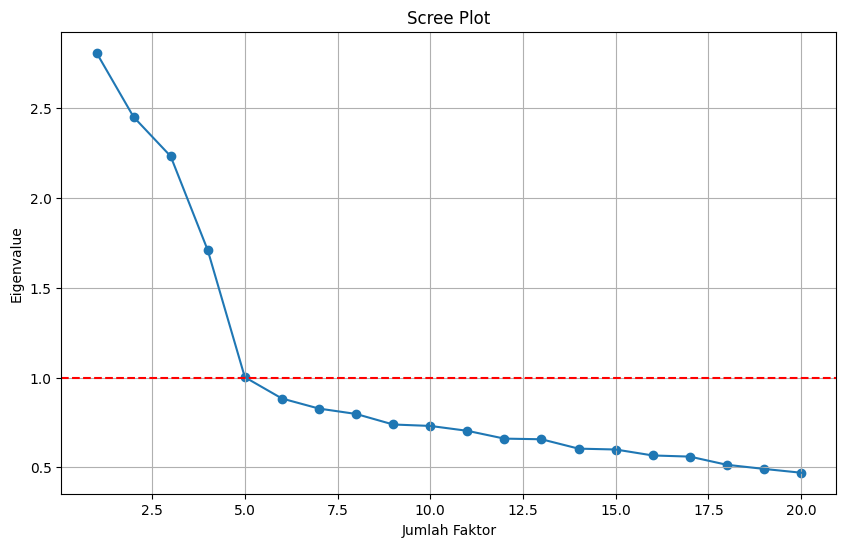

In [29]:
# Diasumsikan 'df_ux_survey' sudah ada dari Bagian 1
import pandas as pd
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

# Jalankan EFA awal untuk mendapatkan eigenvalues
fa = FactorAnalyzer(n_factors=20, rotation=None)
fa.fit(df_ux_survey)
ev, v = fa.get_eigenvalues()

# Membuat Scree Plot
plt.figure(figsize=(10, 6))
plt.scatter(range(1, df_ux_survey.shape[1] + 1), ev)
plt.plot(range(1, df_ux_survey.shape[1] + 1), ev)
plt.title('Scree Plot')
plt.xlabel('Jumlah Faktor')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, color='r', linestyle='--')
plt.grid()
plt.show()


In [32]:
# Menjalankan EFA dengan 4 faktor dan rotasi varimax
fa_final = FactorAnalyzer(n_factors=4, rotation='varimax')
fa_final.fit(df_ux_survey)

# Mendapatkan matriks loadings dalam DataFrame yang rapi
loadings = pd.DataFrame(
    fa_final.loadings_, 
    index=df_ux_survey.columns, 
    columns=['Faktor 1', 'Faktor 2', 'Faktor 3', 'Faktor 4']
)
print("Matriks Loadings (Kekuatan Hubungan):")
loadings


/home/master/anaconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Matriks Loadings (Kekuatan Hubungan):


Faktor 1  Faktor 2  Faktor 3  Faktor 4
q1_keandalan -0.060960  0.049799  0.544685 -0.024593
q2_keandalan  0.065484 -0.001349  0.585642 -0.084355
q3_keandalan -0.078366  0.008387  0.606241  0.040522
q4_keandalan -0.020315 -0.015442  0.607837 -0.019539
q5_keandalan -0.096637  0.026246  0.563009  0.050575
q6_aplikasi  -0.064361  0.594857 -0.037875  0.032325
q7_aplikasi  -0.031736  0.613006  0.038606  0.066845
q8_aplikasi  -0.068944  0.618533  0.049774  0.080580
q9_aplikasi   0.030729  0.620986  0.031318 -0.009025
q10_aplikasi  0.150887  0.506335 -0.006798 -0.059177
q11_layanan   0.636366  0.000039  0.000834 -0.005224
q12_layanan   0.567686  0.001481 -0.049293  0.022214
q13_layanan   0.539364  0.008360 -0.037768 -0.021000
q14_layanan   0.481841  0.017049 -0.081044 -0.023194
q15_layanan   0.605708 -0.006068 -0.000905  0.016577
q16_layanan   0.565858 -0.010038 -0.027985  0.069404
q17_nilai     0.075414  0.004331 -0.062887  0.646609
q18_nilai     0.025314  0.088171 -0.050340  0.536702
q19_nilai     0.069943  0.038518  0.001878  0.553359
q20_nilai    -0.048776 -0.016819  0.029165  0.203650

In [31]:
# Kode untuk mengidentifikasi dan menampilkan item per klaster secara sistematis
klaster_items = {}
# Mendapatkan nama faktor dengan loading tertinggi untuk setiap item
highest_loading_factor = loadings.idxmax(axis=1)

# Mengelompokkan item berdasarkan faktornya
for item, factor_name in highest_loading_factor.items():
    if factor_name not in klaster_items:
        klaster_items[factor_name] = []
    klaster_items[factor_name].append(item)

print("\n--- Klaster yang Teridentifikasi Berdasarkan Hasil Analisis ---")
for factor, items in klaster_items.items():
    print(f"\n{factor}:")
    for item in sorted(items):
        print(f"  - {item}")



--- Klaster yang Teridentifikasi Berdasarkan Hasil Analisis ---

Faktor 3:
  - q1_keandalan
  - q2_keandalan
  - q3_keandalan
  - q4_keandalan
  - q5_keandalan

Faktor 2:
  - q10_aplikasi
  - q6_aplikasi
  - q7_aplikasi
  - q8_aplikasi
  - q9_aplikasi

Faktor 1:
  - q11_layanan
  - q12_layanan
  - q13_layanan
  - q14_layanan
  - q15_layanan
  - q16_layanan

Faktor 4:
  - q17_nilai
  - q18_nilai
  - q19_nilai
  - q20_nilai


In [33]:
# Mendapatkan varians yang dijelaskan oleh setiap faktor
variance_explained = pd.DataFrame(
    fa_final.get_factor_variance(),
    index=['SS Loadings', 'Proportion Var', 'Cumulative Var'],
    columns=['Faktor 1', 'Faktor 2', 'Faktor 3', 'Faktor 4']
)
print("\nVarians yang Dijelaskan per Klaster:")
variance_explained



Varians yang Dijelaskan per Klaster:


Faktor 1  Faktor 2  Faktor 3  Faktor 4
SS Loadings     2.008502  1.767751  1.718615  1.088316
Proportion Var  0.100425  0.088388  0.085931  0.054416
Cumulative Var  0.100425  0.188813  0.274743  0.329159

## Analisis Faktor (Bagian 3): Mengaudit Reliabilitas Pilar UX Anda dengan Cronbach's Alpha di Python

In [34]:
import pandas as pd
import numpy as np
import pingouin as pg

# Diasumsikan 'df_ux_survey' sudah ada dari Bagian 1
# Dan 'klaster_items' adalah dictionary hasil dari Bagian 2

# Jika Anda memulai dari sini, definisikan klaster secara manual:
klaster_items = {
    'Klaster 1: Layanan': ['q11_layanan', 'q12_layanan', 'q13_layanan', 'q14_layanan', 'q15_layanan', 'q16_layanan'],
    'Klaster 2: Keandalan': ['q1_keandalan', 'q2_keandalan', 'q3_keandalan', 'q4_keandalan', 'q5_keandalan'],
    'Klaster 3: Aplikasi': ['q6_aplikasi', 'q7_aplikasi', 'q8_aplikasi', 'q9_aplikasi', 'q10_aplikasi'],
    'Klaster 4: Nilai': ['q17_nilai', 'q18_nilai', 'q19_nilai', 'q20_nilai']
}

# Loop melalui setiap klaster untuk melakukan audit reliabilitas ringkas
print("--- AUDIT RELIABILITAS AWAL ---")
for klaster_name, items in klaster_items.items():
    df_klaster = df_ux_survey[items]
    
    # Hitung Cronbach's Alpha (hanya nilai utama dan interval kepercayaan)
    alpha_summary = pg.cronbach_alpha(data=df_klaster)
    
    # Tampilkan hasil ringkas
    print(f"{klaster_name}: Cronbach's Alpha = {alpha_summary[0]:.3f}")


--- AUDIT RELIABILITAS AWAL ---
Klaster 1: Layanan: Cronbach's Alpha = 0.738
Klaster 2: Keandalan: Cronbach's Alpha = 0.718
Klaster 3: Aplikasi: Cronbach's Alpha = 0.723
Klaster 4: Nilai: Cronbach's Alpha = 0.532


In [35]:
# Analisis detail untuk Klaster 4 "Nilai"
df_nilai = df_ux_survey[klaster_items['Klaster 4: Nilai']]

# Di library statistik yang lebih detail, outputnya akan terlihat seperti ini:
# Mari kita simulasikan tabel output diagnostik yang informatif
# (Dalam praktiknya, Anda bisa menggunakan library seperti 'psych' di R atau fungsi kustom)

# Jalankan kembali alpha untuk mendapatkan objeknya
alpha_nilai_detail = pg.cronbach_alpha(data=df_nilai)
print(f"Alpha Awal untuk Klaster Nilai: {alpha_nilai_detail[0]:.3f}\n")

print("--- TABEL DIAGNOSTIK ITEM (SIMULASI BERDASARKAN PRINSIP STATISTIK) ---")
# Menghitung statistik diagnostik secara manual untuk demonstrasi
results = []
for item_to_drop in df_nilai.columns:
    # Data tanpa item yang sedang diuji
    df_temp = df_nilai.drop(columns=item_to_drop)
    # Total skor dari item lain
    df_temp['total'] = df_temp.sum(axis=1)
    
    # Corrected Item-Total Correlation
    corr = df_nilai[item_to_drop].corr(df_temp['total'])
    
    # Alpha if item dropped
    alpha_if_dropped = pg.cronbach_alpha(data=df_temp.drop(columns='total'))[0]
    
    results.append({'Item': item_to_drop, 'Corrected_Item_Total_Correlation': corr, 'Alpha_If_Dropped': alpha_if_dropped})

diagnostic_table = pd.DataFrame(results)
print(diagnostic_table.round(3))


Alpha Awal untuk Klaster Nilai: 0.532

--- TABEL DIAGNOSTIK ITEM (SIMULASI BERDASARKAN PRINSIP STATISTIK) ---
        Item  Corrected_Item_Total_Correlation  Alpha_If_Dropped
0  q17_nilai                             0.416             0.371
1  q18_nilai                             0.366             0.423
2  q19_nilai                             0.376             0.409
3  q20_nilai                             0.147             0.608


In [36]:
# Menghapus item yang bermasalah berdasarkan bukti dari tabel diagnostik
df_nilai_revised = df_nilai.drop(columns=['q20_nilai'])

# Menjalankan audit ulang untuk verifikasi
alpha_revised = pg.cronbach_alpha(data=df_nilai_revised)

print("\n--- AUDIT ULANG KLASTER NILAI (SETELAH PERBAIKAN) ---")
print(f"Alpha Baru: {alpha_revised[0]:.3f}")



--- AUDIT ULANG KLASTER NILAI (SETELAH PERBAIKAN) ---
Alpha Baru: 0.608
